# SURUTHI S
# 225229141

# ZACHARY'S KARATE CLUB (ZKC) NETWORK

ZKC Shows the relationship among 34 people in a karate club



*   Node represents People
*   Links represents people who are known (both inside and outside)


* Insider and outsider spends social time together


There are 2 important people in this network:

Node 0 : Mr.Higgins

Node 33: Officer


Background : Mr.Higgins and Officer had a fight which splits the group into 2 groups


Officer and Mr.Higgins are the head of 2 separate group



> Each node in the returned graph has a node attribute ‘club’ that indicates the name of the club to which the member represented by that node belongs, either ‘Mr. Hi’ or ‘Officer’. Each edge has a weight based on the number of contexts in which that edge’s incident node members interacted.



[NetworkX Karate Club](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html)

In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ZKC = nx.karate_club_graph()

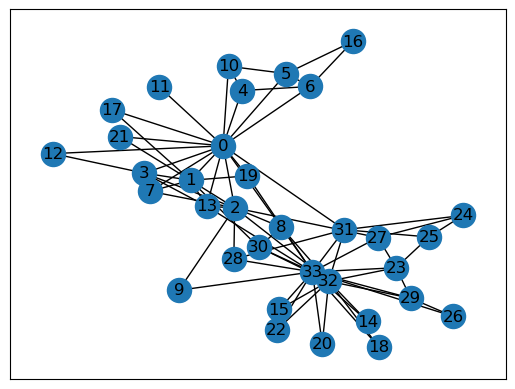

In [3]:
nx.draw_networkx(ZKC,with_labels=True)

In [4]:
mr_hi = 0
officer = 33


club_labels = nx.get_node_attributes(ZKC,'club')

# This function allows you to retrieve the attributes of specific nodes in the graph

In [5]:
print({key:club_labels[key] for key in range(10,20)})

{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi'}


In [6]:
adjacency_matrix = nx.to_numpy_array(ZKC)

print(adjacency_matrix)

[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


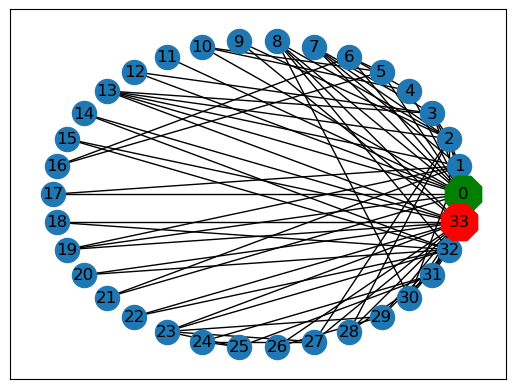

In [68]:
# using circular layout
# pos = nx.circular_layout(ZFC)
circ_pos = nx.circular_layout(ZKC)
nx.draw_networkx(ZKC,pos =circ_pos,with_labels=True)
nx.draw_networkx_nodes(ZKC,pos = circ_pos,nodelist=[mr_hi],node_color = 'g',node_size=800,
                       node_shape='8')
nx.draw_networkx_nodes(ZKC,pos = circ_pos, nodelist = [officer],node_color = 'r',node_size=800,
                      node_shape='8')

Degree refers to **how many edges are present in the network compared to the total possible number of edges**

Density = 0: The graph is completely disconnected (no edges).

Density = 1: The graph is fully connected (all possible edges exist).

**In social network analysis, density is a measure that quantifies the connectedness or cohesion of a network**

Density is particularly useful in understanding the overall structure and relationships within a social network.


A **high density** indicates a **tightly connected network**, where many individuals are connected to each other.

 On the other hand, a **low density** implies a more loosely connected network, where fewer edges are present compared to the total possible number of edges.

In [10]:
# edge density
density = nx.density(ZKC)
density

0.13903743315508021

The degree of a node is indicative of its **level of connectivity** within the social network.

It defines **how many edges each node has**

**Nodes having high centrality plays important role in the network**

In [16]:
degree = ZKC.degree()
degree


DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [17]:
degree_list = []

for node,degree in degree:
    degree_list.append(degree)

In [18]:
degree_list[:10]

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2]

In [19]:
avg_degree = sum(degree_list)/len(degree_list)
avg_degree

4.588235294117647

### Degree Distribution

Text(0.5, 1.0, 'Karate Club Node degree')

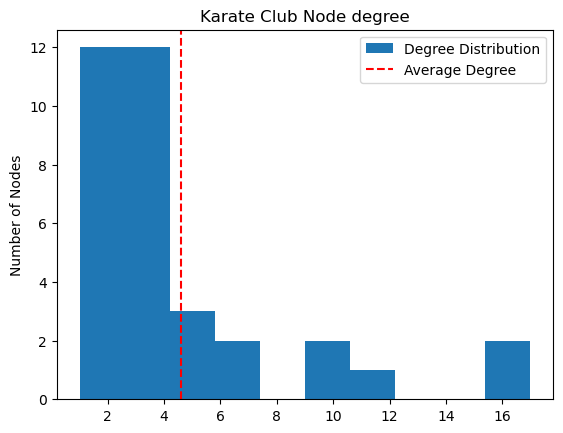

In [20]:
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(avg_degree,color = 'r',linestyle='dashed',label = 'Average Degree')
plt.legend()
plt.ylabel("Number of Nodes")
plt.title("Karate Club Node degree")

# Clustering Co-efficient

can be viewed as a group inside a network

It is used to measure the **degree of clustering or transitivity within a network.** It quantifies how close a node's neighbors are to being a complete clique (smaller communities)


In simpler terms, the clustering coefficient of a node reflects the extent to which its neighbors are connected to each other

High clustering coefficients indicate that nodes tend to form tight-knit groups or communities, while low clustering coefficients suggest a more dispersed or random network structure.

In [22]:
local_clustering_coeff = nx.algorithms.cluster.clustering(ZKC)
local_clustering_coeff

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [23]:
avg_local_cluster_coeff = sum(local_clustering_coeff.values())/len(local_clustering_coeff)
avg_local_cluster_coeff

0.5706384782076823

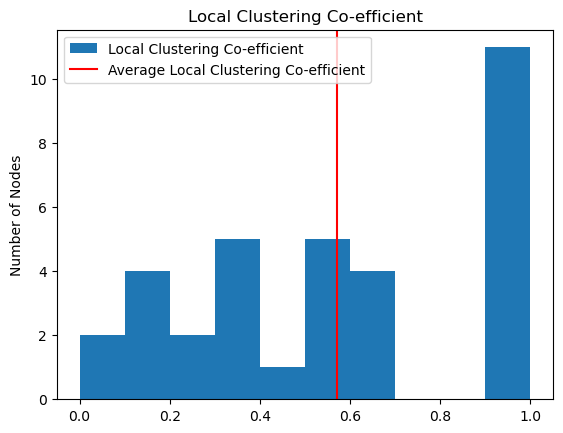

In [24]:
plt.hist(local_clustering_coeff.values(),label = 'Local Clustering Co-efficient')
plt.axvline(avg_local_cluster_coeff,label='Average Local Clustering Co-efficient',color='r')
plt.legend(loc='best')
plt.ylabel("Number of Nodes")
plt.title("Local Clustering Co-efficient")
plt.show()

If the clustering Co-efficient is low it indicates the structural hole in the network it implies that there is a region in the network with missing linkages

# Modularity - detecting communities

 The goal of community detection is to identify groups of nodes that are densely connected within themselves and sparsely connected to nodes outside the group.

In [28]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

In [30]:
total_communities = list(greedy_modularity_communities(ZKC))

In [31]:
total_communities

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

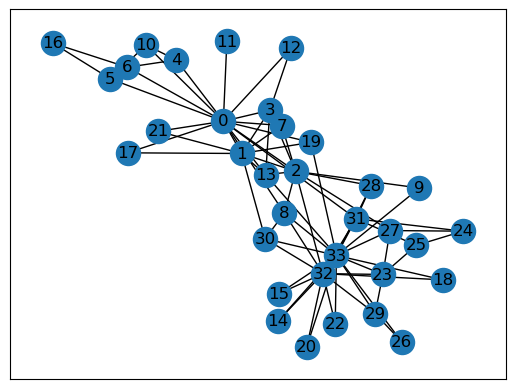

In [32]:
nx.draw_networkx(ZKC,with_labels=True)

In [36]:
community_0 = sorted(total_communities[0])
community_1 = sorted(total_communities[1])
community_2 = sorted(total_communities[2]) 

In [41]:
print(community_0,'\n',community_1,'\n',community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 
 [1, 2, 3, 7, 9, 12, 13, 17, 21] 
 [0, 4, 5, 6, 10, 11, 16, 19]


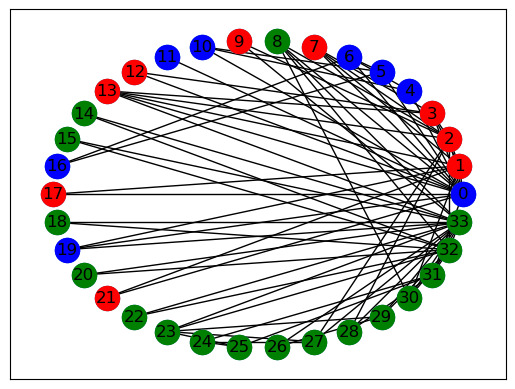

In [59]:
nx.draw_networkx(ZKC,circ_pos)
nx.draw_networkx_nodes(ZKC,circ_pos,nodelist = community_0,node_color='g')
nx.draw_networkx_nodes(ZKC,circ_pos,nodelist = community_1,node_color='r')
nx.draw_networkx_nodes(ZKC,circ_pos,nodelist = community_2,node_color='b')